Importing Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing dataset from drive

In [8]:
x_train="/content/drive/MyDrive/train-images.idx3-ubyte"
y_train="/content/drive/MyDrive/train-labels.idx1-ubyte"
x_test="/content/drive/MyDrive/t10k-images.idx3-ubyte"
y_test="/content/drive/MyDrive/t10k-labels.idx1-ubyte"

In [4]:
!pip install idx2numpy
import idx2numpy

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-cp37-none-any.whl size=7907 sha256=2d2621f04d88da2f3aaac5682970d1055238e30d5cb5c820e1d3456d463d836e
  Stored in directory: /root/.cache/pip/wheels/7a/c1/da/284ce80a748fab898b8d1fa95468a386e7cf3b81da18511f9d
Successfully built idx2numpy


In [9]:
x_train=idx2numpy.convert_from_file(x_train)
y_train=idx2numpy.convert_from_file(y_train)
x_test=idx2numpy.convert_from_file(x_test)
y_test=idx2numpy.convert_from_file(y_test)

In [10]:
print("Training Data:")
print(x_train.shape)
print(y_train.shape)
print("\nTest Data:")
print(x_test.shape)
print(y_test.shape)

Training Data:
(60000, 28, 28)
(60000,)

Test Data:
(10000, 28, 28)
(10000,)


In [11]:
print(x_train[:2,:])

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


Plotting Random image for verification

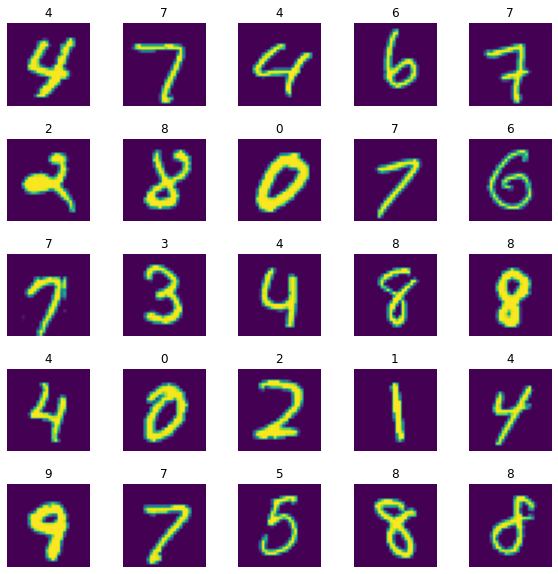

In [12]:
#define the dimensions of the grid
W_grid=5
L_grid=5
fig,axes=plt.subplots(L_grid,W_grid,figsize=(10,10))
n_train=len(x_train)
axes=axes.ravel() #flattening the axis to plot
for i in np.arange(0,W_grid*L_grid):
  index=np.random.randint(0,n_train)
  axes[i].imshow(x_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

Now, We need to reshape the data into 784 pixels format from 28*28 format

In [13]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

**0 1 Classification**


We will be taking 0 and 1 data only and discard the rest from the dataframe

In [14]:
Redundant_Train_index=[]
Redundant_Test_index=[]

In [15]:
for index, label in enumerate(y_train):
  if label>=2:
    Redundant_Train_index.append(index)
for index,label in enumerate(y_test):
  if label>=2:
    Redundant_Test_index.append(index)  

Removing Redundant data

In [16]:
x01_train=np.delete(x_train,Redundant_Train_index,axis=0)
y01_train=np.delete(y_train,Redundant_Train_index,axis=0)

x01_test=np.delete(x_test,Redundant_Test_index,axis=0)
y01_test=np.delete(y_test,Redundant_Test_index,axis=0)

In [17]:
print("Training Data Shape:")
print(x01_train.shape)
print(y01_train.shape)
print("\nTesting Data Shape:")
print(x01_test.shape)
print(y01_test.shape)

Training Data Shape:
(12665, 784)
(12665,)

Testing Data Shape:
(2115, 784)
(2115,)


Plotting the Histogram to check dataset is balanced or not

(array([5923.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6742.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

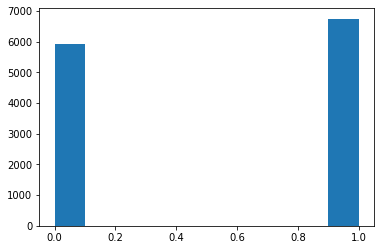

In [18]:
plt.hist(y01_train)

Training of Model and Predicting the labels using Naive Bayes


In [19]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x01_train,y01_train)
y01_pred = classifier.predict(x01_test)

Getting Confusion Matrix, Classification Report, and Accuracy Score

In [20]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print("Confusion Matrix:")
print(confusion_matrix(y01_test, y01_pred))
print("\nClassification Report")
print(classification_report(y01_test, y01_pred))
print("Accuracy:")
print(accuracy_score(y01_test, y01_pred))

Confusion Matrix:
[[ 976    4]
 [  22 1113]]

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.98      0.99      1135

    accuracy                           0.99      2115
   macro avg       0.99      0.99      0.99      2115
weighted avg       0.99      0.99      0.99      2115

Accuracy:
0.9877068557919622


Plotting the ROC AUC Curve

In [22]:
from sklearn.metrics import roc_curve,auc
import plotly.express as px

fpr, tpr, thresholds = roc_curve(y01_pred, y01_test)

from sklearn.metrics import confusion_matrix

figCurve = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.3f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
)
figCurve.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

figCurve.update_yaxes(scaleanchor="x", scaleratio=1)
figCurve.update_xaxes(constrain='domain')

figCurve

**3 8 Classification**

In [23]:
Redundant_Train_index=[]
Redundant_Test_index=[]

In [24]:
for index, label in enumerate(y_train):
  if label!=3 and label!=8:
    Redundant_Train_index.append(index)
for index,label in enumerate(y_test):
  if label!=3 and label!=8:
    Redundant_Test_index.append(index)  

Removing Redundant Data and getting required dataframe to work on

In [25]:
x38_train=np.delete(x_train,Redundant_Train_index,axis=0)
y38_train=np.delete(y_train,Redundant_Train_index,axis=0)

x38_test=np.delete(x_test,Redundant_Test_index,axis=0)
y38_test=np.delete(y_test,Redundant_Test_index,axis=0)

In [26]:
print("Training Data Shape:")
print(x38_train.shape)
print(y38_train.shape)
print("\nTesting Data Shape:")
print(x38_test.shape)
print(y38_test.shape)

Training Data Shape:
(11982, 784)
(11982,)

Testing Data Shape:
(1984, 784)
(1984,)


Plotting the Histogram to get the frequencies of data present of each label 3 and 8

(array([6131.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5851.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

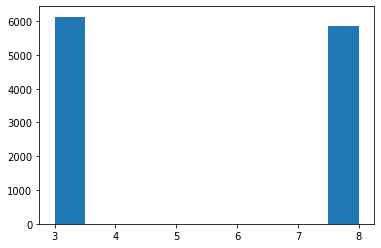

In [27]:
plt.hist(y38_train)

Model Training and Prediction

In [28]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x38_train,y38_train)
y38_pred = classifier.predict(x38_test)

Confusion Matrix, Classification Report, and Accuracy Score

In [29]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print("Confusion Matrix:")
print(confusion_matrix(y38_test, y38_pred))
print("\nClassification Report")
print(classification_report(y38_test, y38_pred))
print("Accuracy:")
print(accuracy_score(y38_test, y38_pred))

Confusion Matrix:
[[435 575]
 [ 22 952]]

Classification Report
              precision    recall  f1-score   support

           3       0.95      0.43      0.59      1010
           8       0.62      0.98      0.76       974

    accuracy                           0.70      1984
   macro avg       0.79      0.70      0.68      1984
weighted avg       0.79      0.70      0.68      1984

Accuracy:
0.6990927419354839


In [30]:
for i in range(0,1984):
    if y38_pred[i] == 3:
      y38_pred[i] = 0
    elif y38_pred[i] == 8:
      y38_pred[i] = 1
    if y38_test[i]==3:
      y38_test[i]=0
    elif y38_test[i]==8:
      y38_test[i]=1

Plotting the ROC AUC curve

In [31]:
fpr38, tpr38, thresholds38 = roc_curve(y38_pred, y38_test)

from sklearn.metrics import confusion_matrix

figCurve38 = px.area(
    x=fpr38, y=tpr38,
    title=f'ROC Curve (AUC={auc(fpr38, tpr38):.3f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
)
figCurve38.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

figCurve38.update_yaxes(scaleanchor="x", scaleratio=1)
figCurve38.update_xaxes(constrain='domain')

figCurve38